In [50]:
import numpy as np
import matplotlib.pyplot as plt

import bk.load
import bk.compute
import bk.plot

In [51]:
data_control = bk.load.digitalin('/mnt/electrophy/Billel/8_channels_relays/arduino_210928_210928_180616/digitalin.dat').T
t_control = np.arange(0,len(data_control)/20000,1/20000)

data_relay = bk.load.digitalin('/mnt/electrophy/Billel/8_channels_relays/arduino_210928_210928_180101/digitalin.dat').T
data_relay[:,15] = ~data_relay[:,15]
t_relay = np.arange(0,len(data_relay)/20000,1/20000)

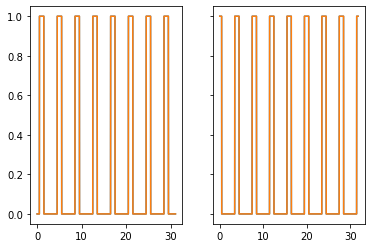

In [52]:
fig, ax = plt.subplots(1,2,sharey=True)
ax[0].plot(t_control,data_control[:,14])
ax[0].plot(t_control,data_control[:,15])

ax[1].plot(t_relay, data_relay[:,14])
ax[1].plot(t_relay, data_relay[:,15])

In [69]:
control_logic = bk.compute.TTL_to_intervals(data_control[:,14],as_nts = True)
control_shock = bk.compute.TTL_to_intervals(data_control[:,15],as_nts = True)
relay_logic = bk.compute.TTL_to_intervals(data_relay[:,14],as_nts = True)
relay_shock = bk.compute.TTL_to_intervals(data_relay[:,15],as_nts = True)
relay_shock = relay_shock.drop_short_intervals(1,time_units='s').reset_index(drop = True)

/home/billel/pCloudDrive/IFM/work/Code/Python/Billel/neuroseries/interval_set.py:66: UserWarning: some ends precede the relative start
  warn(msg, UserWarning)


In [70]:
relay_shock

,start,end
0,3431700,4432000
1,7430700,8430950
2,11429700,12430300
3,15428700,16428950
4,19427650,20428250
5,23426650,24427000
6,27425650,28426300


In [98]:
%matplotlib qt
figs, ax = plt.subplots(1,2,sharey=True)
ax[0].plot(t_control,data_control[:,14])
ax[0].plot(t_control,data_control[:,15])

ax[0].set_xlim(0,0.100)
ax[0].set_title('Control')

ax[1].plot(t_relay,data_relay[:,14])
ax[1].plot(t_relay,data_relay[:,15])

ax[1].set_xlim(0,0.100)
ax[1].set_title('Relays')
# ax[1].legend(['TTL','Shock'],auto = False)


Text(0.5, 1.0, 'Relays')

In [93]:
(control_shock.as_units('s').start - control_logic.as_units('s').start)

0   -0.000049
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
Name: start, dtype: float64

In [86]:
relay_shock

,start,end
0,3431700,4432000
1,7430700,8430950
2,11429700,12430300
3,15428700,16428950
4,19427650,20428250
5,23426650,24427000
6,27425650,28426300
